In [ ]:
# Data preperation
data <- read.csv("/content/red_wine.csv")


x <- as.vector(t(data["alcohol"]))
y <- as.vector(t(data["quality"]))
n <- length(x)
head(x)
head(y)
#Imports
library(mgcv)

#see how 'quality' is distributed
sum(y)

#descriptive statistics of 'alcohol'
min(x)
max(x)
mean(x)
median(x)

[1] 9.4 9.8 9.8 9.8 9.4 9.4

[1] 0 0 0 1 0 0

Loading required package: nlme

This is mgcv 1.9-3. For overview type 'help("mgcv-package")'.



[1] 855

[1] 8.4

[1] 14.9

[1] 10.42298

[1] 10.2

# Parametric logistic regression


Family: binomial 
Link function: logit 

Formula:
y ~ x

Parametric coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -10.76302    0.68326  -15.75   <2e-16 ***
x             1.05559    0.06663   15.84   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


R-sq.(adj) =  0.202   Deviance explained = 15.6%
UBRE = 0.16888  Scale est. = 1         n = 1599

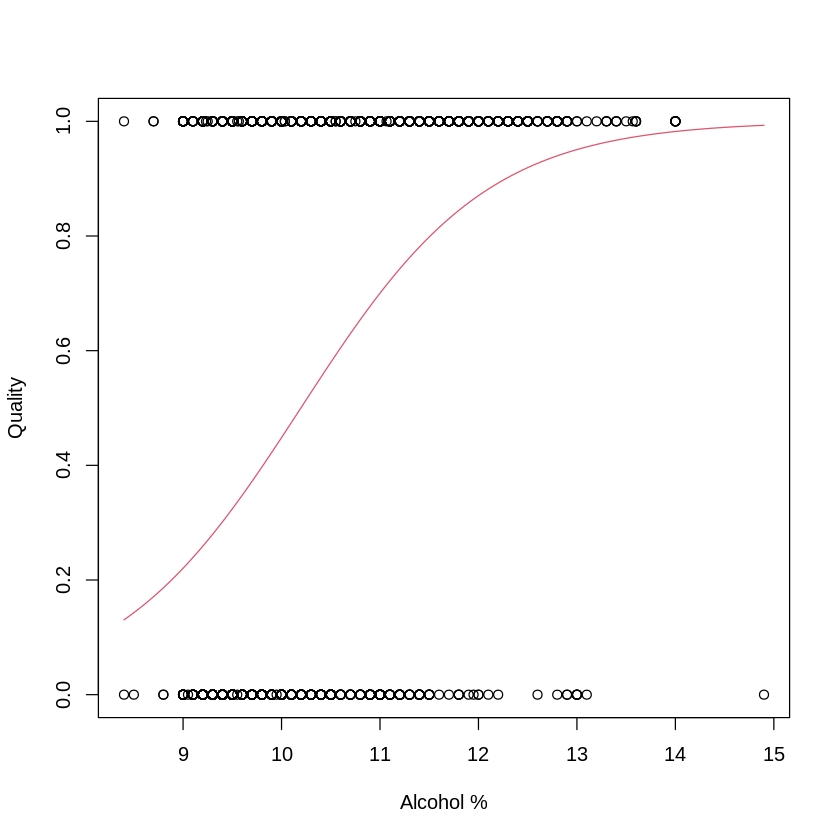

In [ ]:
#Perform a parametric regression quality on alcohol
#Use the logit link function to ensure p in [0,1]
est_par <- gam(y~x,family = binomial)
summary(est_par)
#Generate a sequence of numbers from minimum to maximum of x
xval <- data.frame("x" = seq(min(x), max(x), length.out = 500))
#Predict the quality for this sequence using the parametric model
pred_par <- predict(est_par, xval, se.fit = TRUE)
#Store the fitted values
pred_val_par <- pred_par$fit

#Plot the scatterplot
plot(x,y,ylab = "Quality",xlab = "Alcohol %")
#Plot the predicted values over the sequence, using the logistic function
points(xval$x, exp(pred_val_par)/(1+exp(pred_val_par)), type="l",col=2, lwd = 1)

# Non-parametric logistic regression


Family: binomial 
Link function: logit 

Formula:
y ~ s(x)

Parametric coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  0.26315    0.06319   4.165 3.12e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Approximate significance of smooth terms:
       edf Ref.df Chi.sq p-value    
s(x) 8.677   8.96  271.9  <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

R-sq.(adj) =  0.216   Deviance explained = 17.7%
UBRE = 0.14886  Scale est. = 1         n = 1599

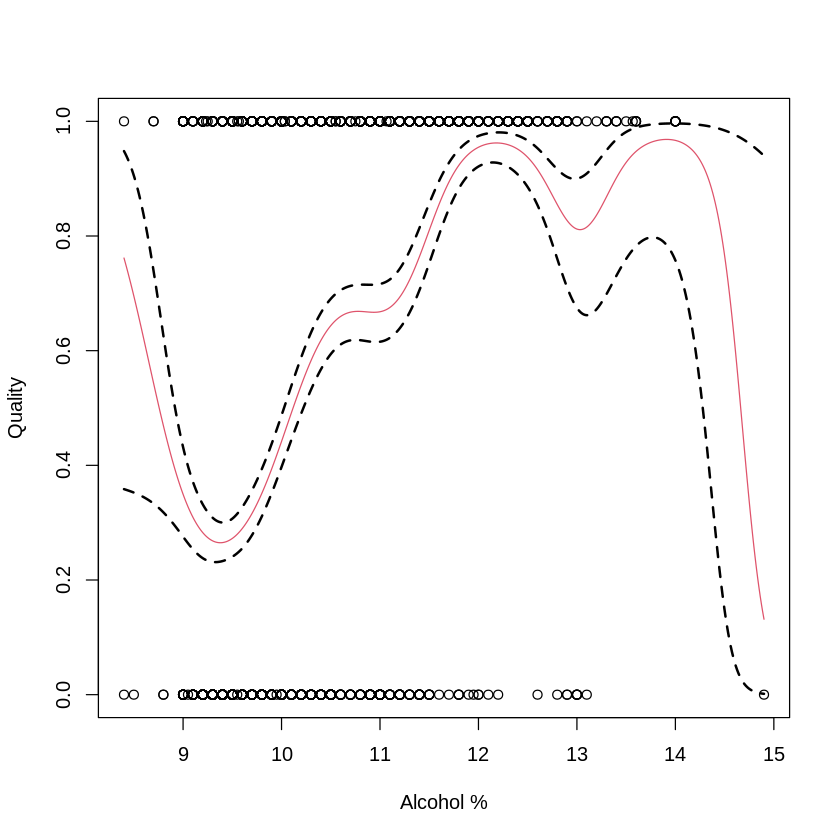

In [ ]:
#Perform a non-parametric, smooth spline regression quality on alcohol
est_s <- gam(y~s(x),family = binomial)
summary(est_s)
#Predict the quality on the sequence above, based on the non-parametric model
pred_np <- predict(est_s, xval, se.fit = TRUE)

#Store the fitted values
pred_val_np <- pred_np$fit
#Construct the confidence intervals by adding the stdnormal quantile times the se
pred_up_np <- pred_val_np + qnorm(0.950)*pred_np$se.fit
pred_lo_np <- pred_val_np + qnorm(0.050)*pred_np$se.fit

#Plot the scatter plot
plot(x,y,ylab = "Quality",xlab = "Alcohol %")
#Plot the predicted values over the sequence, this time using the non-parametric model
points(xval$x, exp(pred_val_np)/(1+exp(pred_val_np)), type="l",col=2, lwd = 1)
#Plot the confidence intervals
points(xval$x, exp(pred_up_np)/(1+exp(pred_up_np)), type="l",lty=2, lwd=2)
points(xval$x, exp(pred_lo_np)/(1+exp(pred_lo_np)), type="l",lty=2, lwd=2)

In [ ]:
#Create a data frame for 9.5%
xval95 <- data.frame("x" = seq(9.5, 9.5))
xval95
#Predict the quality of alcohol = 9.5% using the non-par model
pred95 <- predict(est_s, xval95, se.fit = TRUE)
#Construct prediction intervals
pred_up95 <- pred95$fit + qnorm(0.950)*pred95$se.fit
pred_lo95 <- pred95$fit + qnorm(0.050)*pred95$se.fit

#Compute the fitted value, prediction interval bounds
exp(pred95$fit)/(1+exp(pred95$fit))
exp(pred_up95)/(1+exp(pred_up95))
exp(pred_lo95)/(1+exp(pred_lo95))

#estimated prob ~= 0.272
# estimated interval ~= [0.241, 0.307]

x
<dbl>
9.5


1 
0.2724916

1 
0.3069699

1 
0.2405417

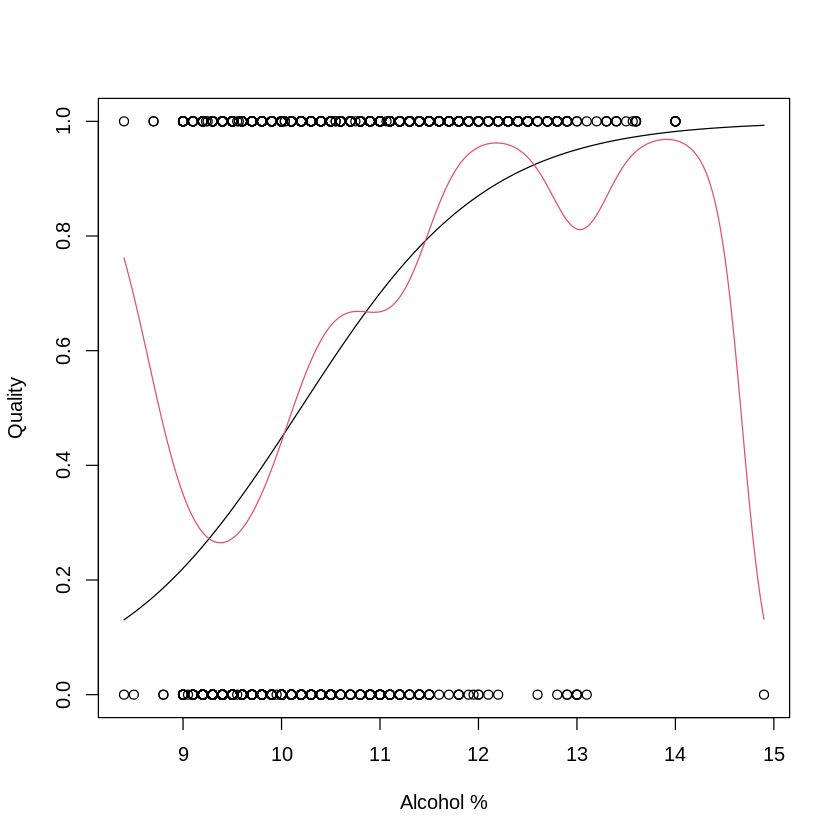

In [ ]:
#comparison between par and non par
plot(x,y,ylab = "Quality",xlab = "Alcohol %")
points(xval$x, exp(pred_val_par)/(1+exp(pred_val_par)), type="l",col=1, lwd = 1)
points(xval$x, exp(pred_val)/(1+exp(pred_val)), type="l",col=2, lwd = 1)